# Homework 6
You need to classify digits with SVM models in this homework. Use PCA to reduce data dimensionality (80% information remain). Compare performance of linear, radial, and polynomial kernals. Tune kernal parameters using Randomsearch method.

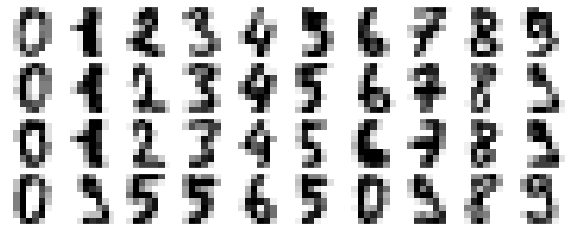

In [136]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()


def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

In [137]:
# Imports for SVM + PCA + RandomsearchCV
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC

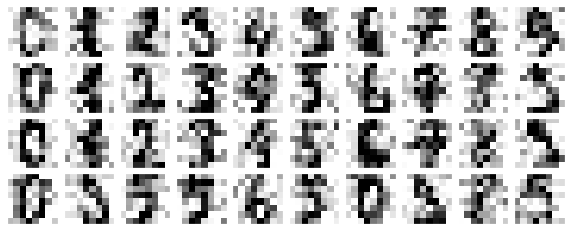

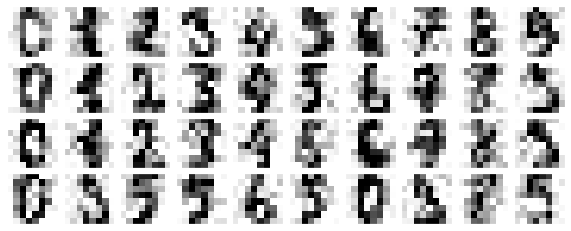

In [138]:
# Use PCA to get 80% of data after applying noise

np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)


pca = PCA(0.80).fit(noisy)
pca.n_components_


components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

X = digits.data
y = digits.target

In [139]:
# make estimator model

estimator = SVC(gamma='scale')

In [140]:
# Linear(just C param)

paramLinear = {'kernel': ['linear'], 'C': [1,2,3,4,5,6,7,8,9,10]}


# Radial(C and Gamma)

paramRadial = {'kernel': ('linear', 'rbf'), 'C': [1,2,3,4,5,6,7,8,9,10]}


# Polynomial(C and degree)

paramPoly = {'kernel': ('linear', 'poly'), 'C': [1,2,3,4,5,6,7,8,9,10]}

In [141]:
# RandomizedSearchCV with 5-fold cross-validation

# Linear(just C param)

linear = RandomizedSearchCV(estimator, paramLinear, cv=5)

searchL = linear.fit(X, y)
print(searchL.best_params_)

# Radial(C and Gamma)

radial = RandomizedSearchCV(estimator, paramRadial, cv=5)

searchR = radial.fit(X, y)
print(searchR.best_params_)

# Polynomial(C and degree)

polynomial = RandomizedSearchCV(estimator, paramPoly, cv=5)

searchP = polynomial.fit(X, y)
print(searchP.best_params_)




{'kernel': 'linear', 'C': 1}
{'kernel': 'rbf', 'C': 8}
{'kernel': 'poly', 'C': 1}
